# Email Spam Classifier

### Introduction 

Let’s suppose you got up in the morning and opened your Gmail and found a mail saying something like:

“Hey, you have won an iPhone 10 in the lucky draw conducted by amazon yesterday. To receive the prize please log in to your account and claim your gift.”

Seeing mail you first checked the sender and you found him to be genuine, and you happily rushed to the site and logged in and found there was no prize at all. Feeling sad you returned to your works.

A few hours later you received a message stating there has been a recent transaction from your bank account and you are shocked how it happened. After telling the incident to the bank, they told you have been spammed and millions are facing the same difficulty, sounds terrible right!

But my friends luckily for you google has some type of mechanism to find these emails and separate them in its SPAM folder

In this project I have csv format dataset. In which only two features are present. 
One is Message(independent) and another one is Label(Dependent/Target).
In target feature we have two class 
1=spam or 2=ham
by using Machine Learning algorithms and Bag Of Words(BOW) nlp method we can find out our testing email is spam or ham.

#### Importing important libraries

In [1]:
# for scientific calculations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# for pre-processing
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# for splitting dataset
from sklearn.model_selection import train_test_split

# Machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# for check performance metrics
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

#### importing dataset 

I have dataset in the .csv format. I took his dataset from Kaggle.com.

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### EDA

#### df.drop()
In our dataset some unwanted columns(Unnamed:2,Unnamed:3,Unnamed:4) are present so we will drop those column first.

In [3]:
df.drop(df.iloc[:,-3:],axis=1,inplace=True)

#### Rename
then we rename our column names

In [4]:
#df.rename(columns={'v1':'Label','v2':'Message'})
df.columns=['Label','Message']

In [5]:
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### NAN / Null values
then we find any missing value present in our dataset.

In [6]:
#df.isnull().sum()
df.isna().sum()

Label      0
Message    0
dtype: int64

#### Lables
We check clasees present in our target variable/feature
we got two classes 'spam' and 'ham'

In [7]:
df['Label'].unique()

array(['ham', 'spam'], dtype=object)

#### Balance of data
Now we check our dataset balanced or not. By using the target feature and their classwise count we identify that our dataset is balanced or not.

In [8]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

Clearly, the data is imbalanced and there are more good emails(ham) than spam emails. This may lead to a problem as a model may learn all the features of the ham emails over spam emails and thus always predict all emails as ham(OVERFITTIN!). So before proceeding, we need to take care of that.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

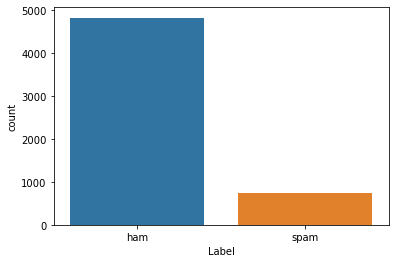

In [9]:
sns.countplot('Label',data=df)

#### Undersampling

Undersampling is a technique where the majority class is downsampled to match the minority class. Since our data has only one column(feature) it ok to use it.
This is an nlp problem. Most of the nlp problems we need to do undersamplig to balance our dataset. 

In [10]:
df_spam = df[df['Label']=='spam']
df_ham = df[df['Label']=='ham']

In [11]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [12]:
df_balanced = pd.concat([df_spam , df_ham_downsampled])

In [13]:
df_balanced.Label.value_counts()

spam    747
ham     747
Name: Label, dtype: int64

Now we get balanced dataset in which both classes are having same number of rows or count.

In [14]:
df_balanced.reset_index(inplace=True)

In [15]:
df_balanced.drop('index',axis=1,inplace=True)

In [16]:
df_balanced.head()

,Label,Message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

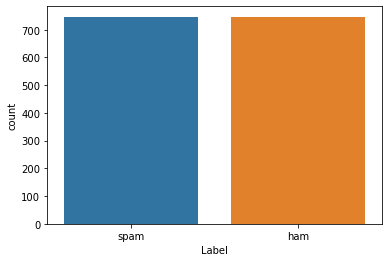

In [17]:
sns.countplot('Label',data=df_balanced)

### Pre-processing

#### Stemmimg
It is the process of reducing infected words to check word stem.

we know that the stemming is best pre processing method used for spam classification in NLP.
By using portstemmer we make stemming.

In [18]:
ps = PorterStemmer()

Using Portstemmer we can make stemming

using python code we find out stemming words and append those whole sentence in corpus.

In [19]:
corpus = []
for i in range(0,len(df_balanced)):
    review = re.sub('[^a-zA-Z]',' ',df_balanced['Message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word)for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus

['free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclub com n qjkgighjjgcbl',
 'england v macedonia dont miss goal team news txt ur nation team eg england tri wale scotland txt poboxox w wq',
 'thank subscript rington uk mobil charg month pleas confirm repli ye repli charg',
 'rodger burn msg tri call repli sm free nokia mobil free camcord pleas call deliveri tomorrow',
 'sm ac sptv new jersey devil detroit

### Feature Scaling

By using Countvectorizer() we convert all words of independent feature into vectors.

In [21]:
cv = CountVectorizer()

In [22]:
X = cv.fit_transform(corpus).toarray()

In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

By using LabelEncoder() we convert classes of target feature into 0 and 1 value

In [24]:
lb = LabelEncoder()

In [25]:
y = lb.fit_transform(df_balanced['Label'])
y

array([1, 1, 1, ..., 0, 0, 0])

#### train_test_split
Now as our data is processed, we can feed it to the model, but if we do so it may be that model will learn the patterns of the data, and when we evaluate it will always predict the right results, which leads to biasing of the model. So we will follow the train test strategy.

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.2)

### Model building

finally we come on model building stage after EDA,Pre-processing,Feature scaling,Feature Engineering

In [27]:
model_1 = MultinomialNB()
model_2 = RandomForestClassifier()
models = [model_1,model_2]

### Now we check each ML model for performance metrics

MultinomialNB()
**********
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       152
           1       0.95      0.94      0.95       147

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299

 
Accuracy using MultinomialNB()is 94 %
**********
RandomForestClassifier()
**********
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       159
           1       0.95      0.99      0.97       140

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

 
Accuracy using RandomForestClassifier()is 96 %
**********


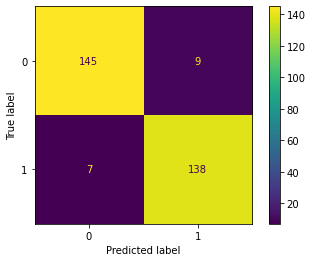

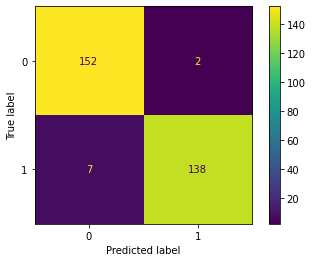

In [28]:
for i in models:
    print(i)
    training = i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    print('*'*10)
    print(classification_report(y_pred,y_test))
    print(' ')
    print('Accuracy using '+str(i)+'is '+str(int(accuracy_score(y_test,y_pred)*100))+' %')
    print('*'*10)